In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor #regression library
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LONDON_DATA_FILE_GROUPED_TIMESERIES= 'house_prices_london_grouped_timeseries.csv'

In [3]:
df = pd.read_csv(LONDON_DATA_FILE_GROUPED_TIMESERIES, header=0)

In [4]:
df = df[df['Sold Price']<1000000]

In [5]:
df.dtypes

Sold Price               float64
Postcode_short            object
Sold Year                  int64
Type                      object
Sold Price prev year     float64
Sold Price prev year2    float64
Sold Price prev year3    float64
dtype: object

In [6]:
df.dropna(subset=['Type'], inplace=True)
dummy_df = pd.get_dummies(df['Type'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Type', axis=1, inplace=True)

In [7]:
df.head()

,Sold Price,Postcode_short,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T
0,108500.0,E1,1995,NaN,NaN,NaN,1,0,0,0,0
1,57995.0,E1,1995,NaN,NaN,NaN,0,1,0,0,0
2,77000.0,E1,1995,NaN,NaN,NaN,0,0,0,1,0
3,81000.0,E1,1995,NaN,NaN,NaN,0,0,0,0,1
4,63950.0,E1,1996,57995.0,NaN,NaN,0,1,0,0,0


In [8]:
#df.dropna(subset=['Postcode_short'], inplace=True)
dummy_df = pd.get_dummies(df['Postcode_short'])
df = pd.concat([df, dummy_df], axis=1)
df.drop('Postcode_short', axis=1, inplace=True)

In [9]:
df.head()

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
0,108500.0,1995,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,57995.0,1995,NaN,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,77000.0,1995,NaN,NaN,NaN,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,81000.0,1995,NaN,NaN,NaN,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,63950.0,1996,57995.0,NaN,NaN,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
final_df=df[df['Sold Year']>=1998] #data prior to this has Nan

In [11]:
final_df.shape

(9576, 199)

In [12]:
final_df=final_df.dropna() #drop all rows with Nan

In [13]:
final_df.shape

(8663, 199)

In [14]:
final_df.head(5)

,Sold Price,Sold Year,Sold Price prev year,Sold Price prev year2,Sold Price prev year3,D,F,O,S,T,...,WC1N,WC1R,WC1V,WC1X,WC2A,WC2B,WC2E,WC2H,WC2N,WC2R
12,112995.0,1998,79997.5,63950.0,57995.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,130000.0,1998,149497.5,94000.0,77000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
14,118000.0,1998,102000.0,80000.0,81000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
16,121075.0,1999,112995.0,79997.5,63950.0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,140000.0,1999,130000.0,149497.5,94000.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
train_df=final_df[final_df['Sold Year']<=2010]
test_df=final_df[final_df['Sold Year']>2010]

In [16]:
train_df.shape

(5980, 199)

In [17]:
test_df.shape

(2683, 199)

In [18]:
X_train=train_df.drop(['Sold Price'],axis=1)
X_train = np.array(X_train)
y_train=train_df['Sold Price'] 
y_train = np.array(y_train)

In [19]:
X_test=test_df.drop(['Sold Price'],axis=1)
X_test = np.array(X_test)
y_test=test_df['Sold Price'] 
y_test = np.array(y_test)

In [20]:
print(X_train.shape)
print(y_train.shape)

(5980, 198)
(5980,)


In [21]:
print(X_test.shape)
print(y_test.shape)

(2683, 198)
(2683,)


In [22]:
model = KNeighborsRegressor(n_neighbors=15) 
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

In [23]:
y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred) #set ceiling value for y_pred
y_actual = y_test #rename to make it easier to understand
mean_squared_error(y_actual, y_pred) 

15884590096.174339

In [24]:
mean_absolute_error(y_actual, y_pred) 

75528.056093924708

0.690828853033


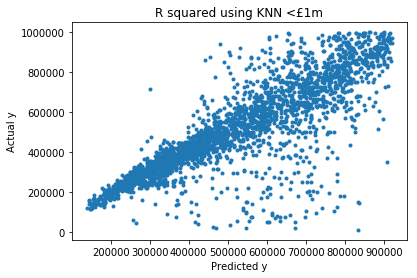

In [27]:
# Test R^2
print(model.score(X_test, y_actual))
plt.scatter(y_pred, y_actual, marker='.')
plt.xlabel('Predicted y')
plt.ylabel('Actual y')
#plt.gca().set_aspect('equal') #set same scale for x and y
#plt.axis('equal')
plt.title('R squared using KNN <£1m')
plt.show()
#output not that useful here


In [26]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = 326167.0, Actual = 296687.5
Predicted = 507699.0, Actual = 362000.0
Predicted = 468817.0, Actual = 406500.0
Predicted = 335967.0, Actual = 295000.0
Predicted = 447184.0, Actual = 480000.0
Predicted = 440842.0, Actual = 465000.0
Predicted = 344030.0, Actual = 335000.0
Predicted = 511184.0, Actual = 570000.0
Predicted = 359780.0, Actual = 397500.0
Predicted = 594800.0, Actual = 731250.0
Predicted = 415850.0, Actual = 475000.0
Predicted = 702184.0, Actual = 650000.0
Predicted = 487264.0, Actual = 500000.0
Predicted = 728194.0, Actual = 415000.0
Predicted = 762220.0, Actual = 719000.0
Predicted = 513897.0, Actual = 518000.0
Predicted = 661667.0, Actual = 250000.0
Predicted = 772530.0, Actual = 857500.0
Predicted = 322794.0, Actual = 245000.0
Predicted = 195385.0, Actual = 166100.0
Predicted = 363165.0, Actual = 250000.0
Predicted = 330724.0, Actual = 248000.0
Predicted = 280067.0, Actual = 278997.5
Predicted = 188187.0, Actual = 177000.0
Predicted = 274247.0, Actual = 313500.0


Predicted = 266894.0, Actual = 300000.0
Predicted = 392710.0, Actual = 362500.0
Predicted = 200127.0, Actual = 210000.0
Predicted = 341830.0, Actual = 400000.0
Predicted = 332688.0, Actual = 357000.0
Predicted = 413734.0, Actual = 385000.0
Predicted = 227679.0, Actual = 210000.0
Predicted = 340514.0, Actual = 200000.0
Predicted = 420850.0, Actual = 412500.0
Predicted = 362867.0, Actual = 365000.0
Predicted = 469582.0, Actual = 411500.0
Predicted = 813052.0, Actual = 820000.0
Predicted = 447456.0, Actual = 415000.0
Predicted = 848150.0, Actual = 950000.0
Predicted = 606434.0, Actual = 975000.0
Predicted = 465723.0, Actual = 540000.0
Predicted = 527114.0, Actual = 610000.0
Predicted = 592026.0, Actual = 635000.0
Predicted = 711165.0, Actual = 628000.0
Predicted = 700694.0, Actual = 675000.0
Predicted = 893600.0, Actual = 805000.0
Predicted = 236464.0, Actual = 227750.0
Predicted = 468547.0, Actual = 380000.0
Predicted = 438808.0, Actual = 420000.0
Predicted = 889150.0, Actual = 835000.0


k=3
mean_squared_error(y_actual, y_pred) =1601106779995.6311
print(model.score(X_test, y_actual))=0.365012456468

k=5
mean_squared_error(y_actual, y_pred) =1513247374453.6899
print(model.score(X_test, y_actual))=0.399856873734

k=10 
mean_squared_error(y_actual, y_pred) =1525870415661.2219
print(model.score(X_test, y_actual))=0.394850658441

k=15
mean_squared_error(y_actual, y_pred) =1536606709712.6035
print(model.score(X_test, y_actual))=0.390592719784